4
0  =  3.91649125627335
1  =  33.993426918148366
2  =  46.66192804275853
3  =  1.881035066776426
4  =  28.543841354178564
5  =  24.1296476086492
6  =  6.3163587190180905
7  =  43.815498740194755
8  =  20.49593050237813
9  =  14.805405721908155
10  =  28.26465326924045
11  =  2.9154860377037837
12  =  47.07509687357168
13  =  20.9787860834072
14  =  33.250760670968084
15  =  33.801343724948886
16  =  13.011427866998519
17  =  32.4046549859621
18  =  23.84071260272776
19  =  0.45087925712613686
20  =  1.030425913826639
21  =  36.113056017842915
22  =  8.385839724817995
23  =  18.210780486042445
24  =  22.612582871197986
25  =  18.74551787168357
26  =  45.7947271947699
27  =  13.05075405483036
28  =  11.879042287954753
29  =  34.65105647141008
30  =  44.785839085700516
31  =  18.810091984595957
32  =  31.83312489444303
33  =  47.2539898987457
34  =  1.1553018830927533
35  =  42.26273933332451
36  =  40.05627103576819
37  =  7.976493552840429
38  =  37.92591496961387
39  =  22.17083734178

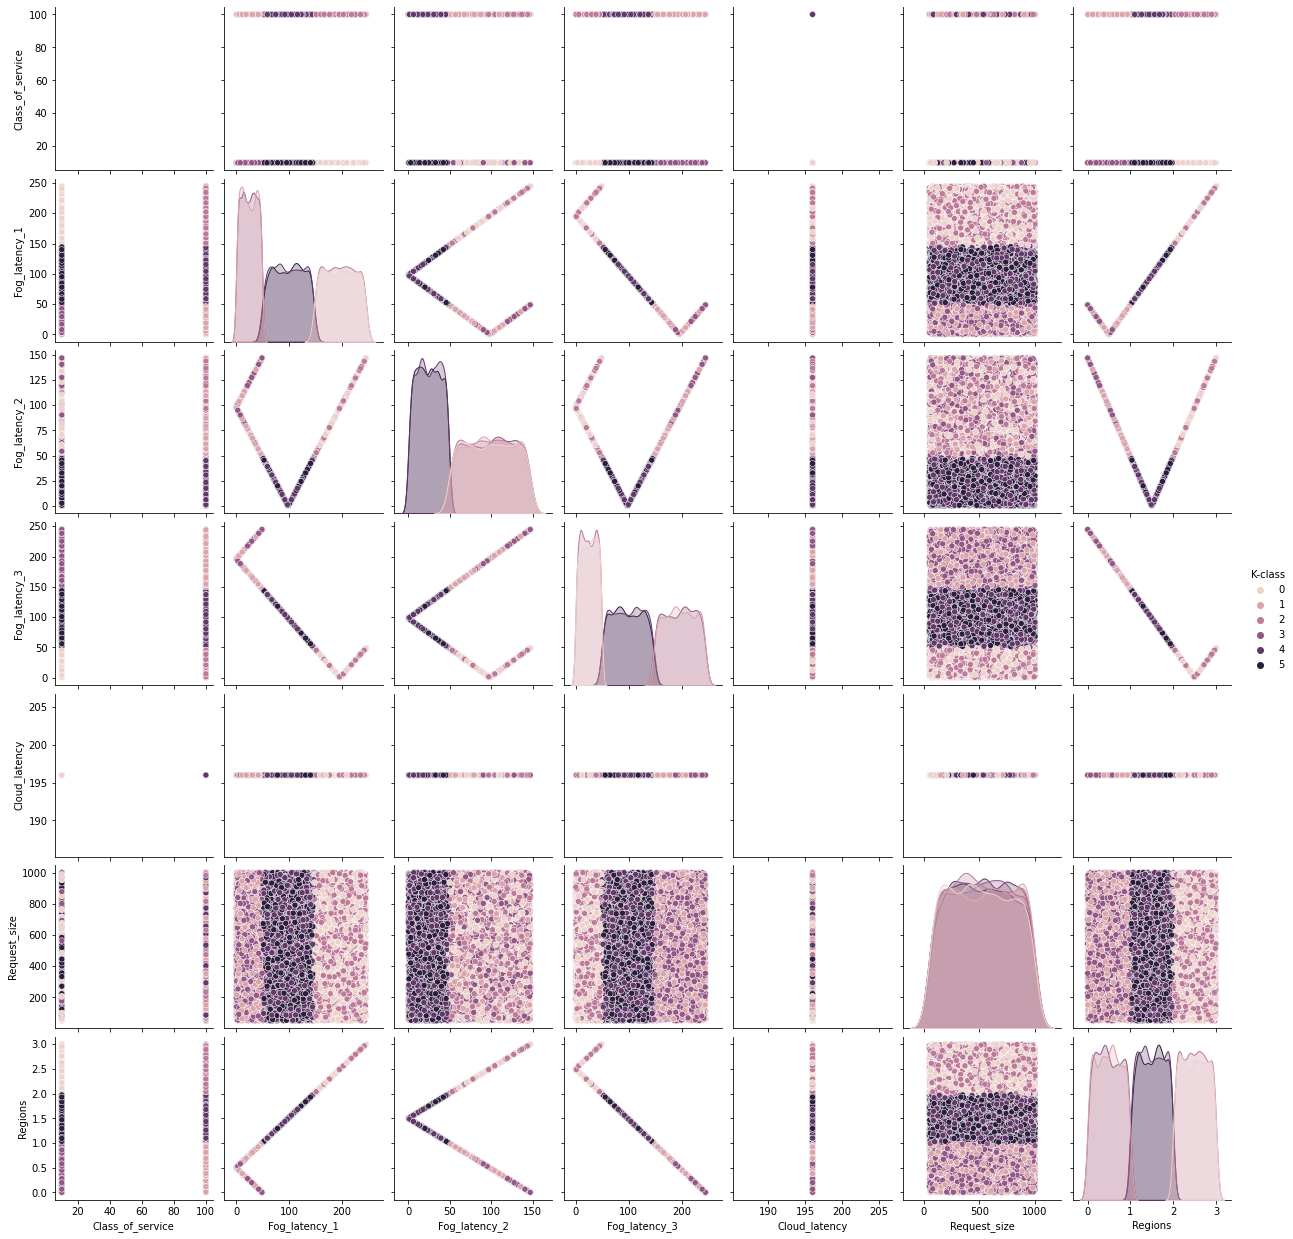

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))


sum_of_squares = calculate_wcss(X)

n = optimal_number_of_clusters(sum_of_squares)

print(n)

#aplicação do kmeans
kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency
    print(index, " = ", smallest_latency)

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  6
quantidade dispositivos standard =  12
Menor latencia media =  9.925798563405753
latencia média por prioridade =  140.59246523007243
Horário =  1
Número ótimo de clusters =  6
quantidade dispositivos prioritarios =  16
quantidade dispositivos standard =  20
Menor latencia media =  8.219164876659658
latencia média por prioridade =  117.10805376554852
Horário =  2
Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  28
quantidade dispositivos standard =  42
Menor latencia media =  9.548933081709041
latencia média por prioridade =  127.14893308170906
Horário =  3
Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  63
Menor latencia media =  12.40712034781733
latencia média por prioridade =  109.63546680451029
Horário =  4
Número ótimo de clusters 

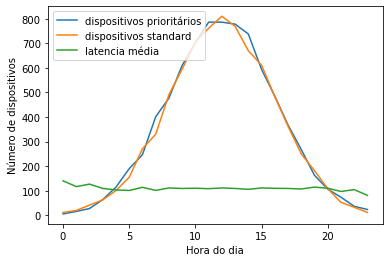

In [2]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    print("Número ótimo de clusters = ", n)

    #aplicação do kmeans
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    #kmeans.labels_
    df_by_hour[str(i)]['K-class'] = kmeans.labels_
    #devicesDf

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)
    #sb.pairplot(df_by_hour[str(i)], hue="K-class")

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
### Parameters:
> devices_region_1 : list [devices]<br> 
> devices_region_2 : list [devices]<br>
> devices_region_3 : list [devices]<br>
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [3]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

## Function: fog_first_alocation<br>
### Parameters:
> devices_region_1 : list [devices]<br> 
> devices_region_2 : list [devices]<br>
> devices_region_3 : list [devices]<br>
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [4]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                # search for no_priority device connected to fog node
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_standard += 1

    return latency_by_priority, num_priority, num_standard

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[<utilities.FogNode object at 0x7f4cd8797610>, <utilities.FogNode object at 0x7f4cd8681cd0>, <utilities.FogNode object at 0x7f4cd8681910>, <utilities.CloudNode object at 0x7f4cd8797580>]
[(0.2618843389144818, 2), (0.8561956225394924, 0), (1.464727612007937, 4), (1.8730654612030249, 1), (2.2723184790253708, 3), (2.505107169482498, 5)]
Alocation process time:  0.0001874390000011772
Latencia media:  24.71042908946799
Horário =  1
[<utilities.FogNode object at 0x7f4cd8a49550>, <utilities.FogNode object at 0x7f4cd88d6fd0>, <utilities.FogNode object at 0x7f4cd899c0d0>, <utilities.CloudNode object at 0x7f4cd8a493a0>]
[(0.47764292254065643, 4), (1.031416056497854, 1), (1.6230193100304344, 3), (1.9106881582090312, 5), (2.5379879981450895, 0), (2.662421357454436, 2)]
Alocation process time:  0.0002697629997783224
Latencia media:  28.335715536932454
Horário =  2
[<utilities.FogNode object at 0x7f4c

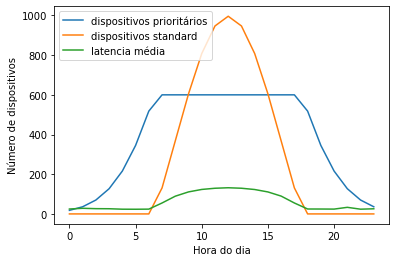

In [5]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []
#processing_nodes = utilities.instantiate_processing_nodes(1, 3)

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
# Definição ótima da quantidade de clusters


def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2


def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss


#def alocation_by_priority(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard):
    
    for index in range(len(devices_region_1)):
        # verify the priority and the availability of the fog node
        if devices_region_1[index]["Class_of_service"] == 100 and len(processing_nodes[1].connected_devices) < processing_nodes[1].device_capacity:
            processing_nodes[1].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Fog_latency_1"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_2)):
        if devices_region_2[index]["Class_of_service"] == 100 and len(processing_nodes[2].connected_devices) < processing_nodes[2].device_capacity:
            processing_nodes[2].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Fog_latency_2"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_3)):
        if devices_region_3[index]["Class_of_service"] == 100 and len(processing_nodes[3].connected_devices) < processing_nodes[3].device_capacity:
            processing_nodes[3].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Fog_latency_3"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Cloud_latency"]
            num_standard += 1

    return latency_by_priority, num_priority, num_standard

#def fog_first_alocation(devices_region_1, devices_region_2, devices_region_3, processing_nodes):
    latency_by_priority = []
    num_priority = 0
    num_standard = 0
    
    for index in range(len(devices_region_1)):
        # verify the priority and the availability of the fog node
        if len(processing_nodes[1].connected_devices) < processing_nodes[1].device_capacity:
            processing_nodes[1].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Fog_latency_1"]
            num_priority += 1
        else:
            # search for no_priority device connected to fog node
            for device_index in range(len(processing_nodes[1].connected_devices)):
                if processing_nodes[1].connected_devices[device_index]["Class_of_service"] == 10:
                    no_priority_device = processing_nodes[1].connected_devices[device_index]
                    # disconnect device from fog node
                    processing_nodes[1].connected_devices.pop(device_index)
                    # connect no-priority device on cloud node    
                    processing_nodes[0].connected_devices.append(
                        no_priority_device)
                    # connect new priority device on the fog node
                    processing_nodes[1].connected_devices.append(devices_region_1[index])
                    
                    break
            # if no no-priority device in found, just connect to the cloud
            processing_nodes[0].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_2)):
        if len(processing_nodes[2].connected_devices) < processing_nodes[2].device_capacity:
            processing_nodes[2].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Fog_latency_2"]
            num_priority += 1
        else:
            for device_index in range(len(processing_nodes[2].connected_devices)):
                if processing_nodes[2].connected_devices[device_index]["Class_of_service"] == 10:
                    no_priority_device = processing_nodes[2].connected_devices[device_index]
                    # disconnect device from fog node
                    processing_nodes[2].connected_devices.pop(device_index)
                    # connect no-priority device on cloud node    
                    processing_nodes[0].connected_devices.append(
                        no_priority_device)
                    # connect new priority device on the fog node
                    processing_nodes[2].connected_devices.append(devices_region_2[index])
                    
                    break
            processing_nodes[0].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_3)):
        if len(processing_nodes[3].connected_devices) < processing_nodes[3].device_capacity:
            processing_nodes[3].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Fog_latency_3"]
            num_priority += 1
        else:
            for device_index in range(len(processing_nodes[3].connected_devices)):
                if processing_nodes[3].connected_devices[device_index]["Class_of_service"] == 10:
                    no_priority_device = processing_nodes[3].connected_devices[device_index]
                    # disconnect device from fog node
                    processing_nodes[3].connected_devices.pop(device_index)
                    # connect no-priority device on cloud node    
                    processing_nodes[0].connected_devices.append(
                        no_priority_device)
                    # connect new priority device on the fog node
                    processing_nodes[3].connected_devices.append(devices_region_3[index])
                    
                    break
            processing_nodes[0].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Cloud_latency"]
            num_standard += 1

    return latency_by_priority, num_priority, num_standard

# Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    print(processing_nodes)

    # removing some not used columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    # clustering by hour
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)
    # print("########## Region 1 ##########")
    # print(devices_region_1)
    # print("########## Region 2 ##########")
    # print(devices_region_2)
    # print("########## Region 3 ##########")
    # print(devices_region_3)

    ############
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ############
    #latency_by_priority, num_priority, num_standard = alocation_by_priority(devices_regions, processing_nodes)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_regions, processing_nodes)', globals=globals(), number=1)
    
    # ALOCATION - FOG FIRST #
    latency_by_priority, num_priority, num_standard = fog_first_alocation(devices_regions, processing_nodes)
    result = timeit.timeit(stmt='fog_first_alocation(devices_regions, processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    # print("############ Connected fog 1 ############")
    # print(processing_nodes[1].connected_devices)
    # print("############ Connected cloud ############")
    # print(processing_nodes[0].connected_devices)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()